In [5]:
# Plotting
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.cm as cm
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

input_dir = '/home/hutr/iot-longitudinal/output_destination/{device_comparison_set}/_domain_org_summary'
device_comparison_set = ['common_devices', 'all_devices_remove_duplicates']

input_dir = input_dir.format(device_comparison_set=device_comparison_set[0])





lefun-cam-wired
appletv-wifi


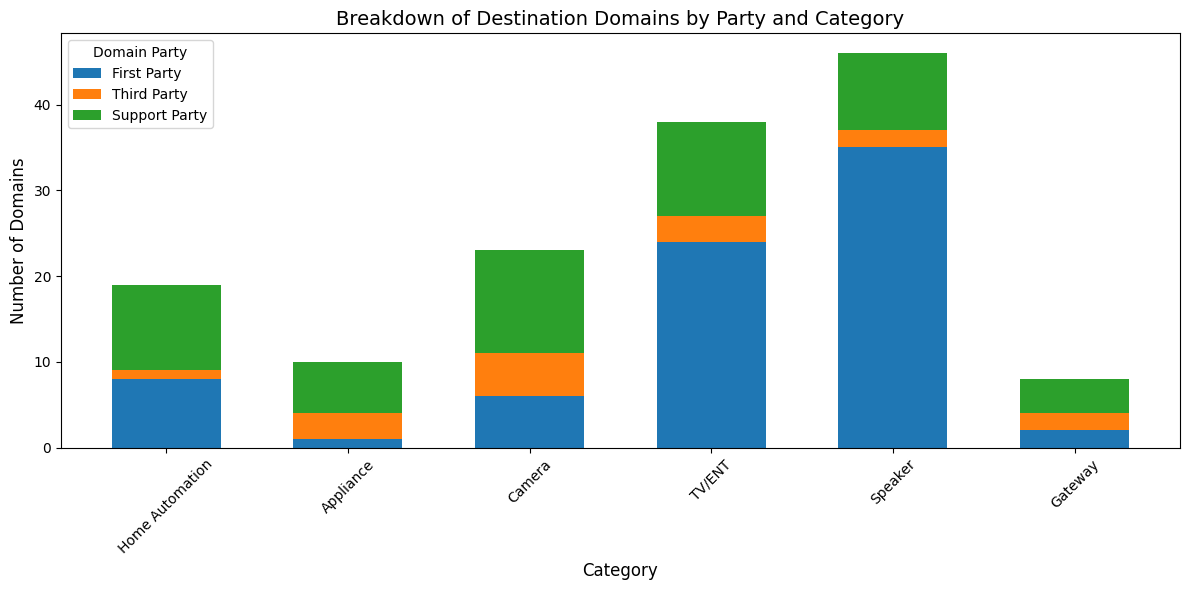

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = {
    "Category": ["Home Automation", "Appliance", "Camera", "TV/ENT", "Speaker", "Gateway", "Total"],
    "Count": [4, 4, 5, 3, 4, 2, 22],
    "Domain Count": [19, 10, 23, 38, 46, 8, 144],
    "First Party": [8, 1, 6, 24, 35, 2, 76],
    "Third Party": [1, 3, 5, 3, 2, 2, 16],
    "Support Party": [10, 6, 12, 11, 9, 4, 52],
}
df = pd.DataFrame(data)

# Remove the "Total" row for category-specific visualization
df_filtered = df[df["Category"] != "Total"]

# Stacked bar chart
categories = df_filtered["Category"]
x = np.arange(len(categories))
width = 0.6

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, df_filtered["First Party"], width, label="First Party", color="tab:blue")
ax.bar(x, df_filtered["Third Party"], width, bottom=df_filtered["First Party"], label="Third Party", color="tab:orange")
ax.bar(x, df_filtered["Support Party"], width, 
       bottom=df_filtered["First Party"] + df_filtered["Third Party"], label="Support Party", color="tab:green")

# Customize plot
ax.set_title("Breakdown of Destination Domains by Party and Category", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Number of Domains", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10, rotation=45)
ax.legend(title="Domain Party", loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipykernel_866643/1068848732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total"] = df_filtered["First Party"] + df_filtered["Third Party"] + df_filtered["Support Party"]
/tmp/ipykernel_866643/1068848732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["First Party (%)"] = df_filtered["First Party"] / df_filtered["Total"]
/tmp/ipykernel_866643/1068848732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

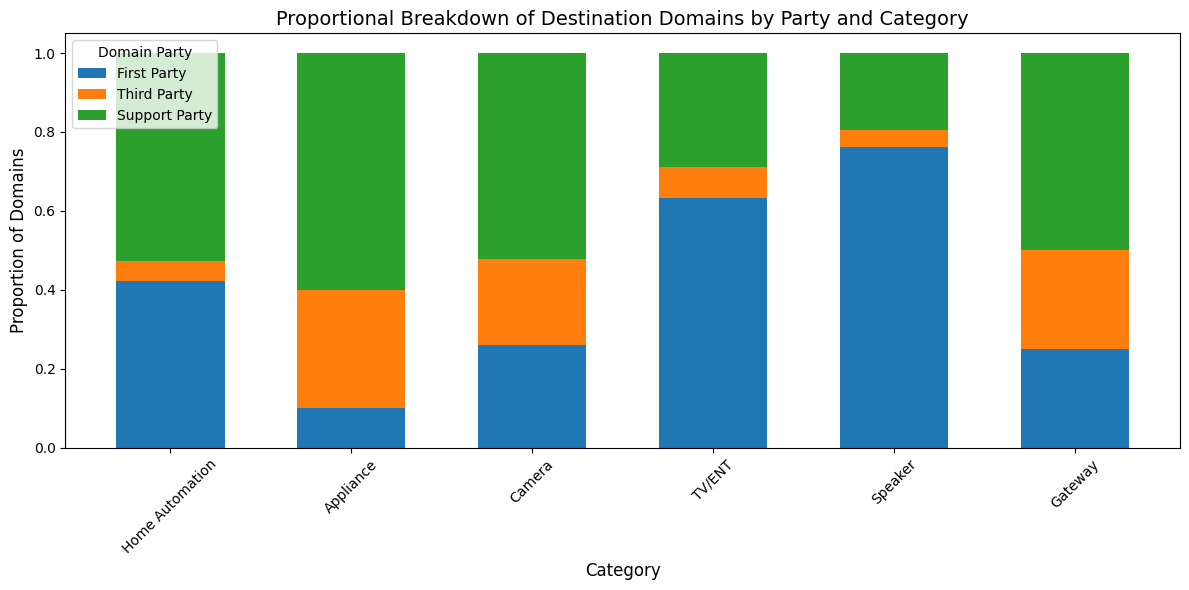

In [7]:
# Calculate proportions
df_filtered["Total"] = df_filtered["First Party"] + df_filtered["Third Party"] + df_filtered["Support Party"]
df_filtered["First Party (%)"] = df_filtered["First Party"] / df_filtered["Total"]
df_filtered["Third Party (%)"] = df_filtered["Third Party"] / df_filtered["Total"]
df_filtered["Support Party (%)"] = df_filtered["Support Party"] / df_filtered["Total"]

# Proportional stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, df_filtered["First Party (%)"], width, label="First Party", color="tab:blue")
ax.bar(x, df_filtered["Third Party (%)"], width, bottom=df_filtered["First Party (%)"], label="Third Party", color="tab:orange")
ax.bar(x, df_filtered["Support Party (%)"], width, 
       bottom=df_filtered["First Party (%)"] + df_filtered["Third Party (%)"], label="Support Party", color="tab:green")

# Customize plot
ax.set_title("Proportional Breakdown of Destination Domains by Party and Category", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Proportion of Domains", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10, rotation=45)
ax.legend(title="Domain Party", loc="upper left")
plt.tight_layout()
plt.show()

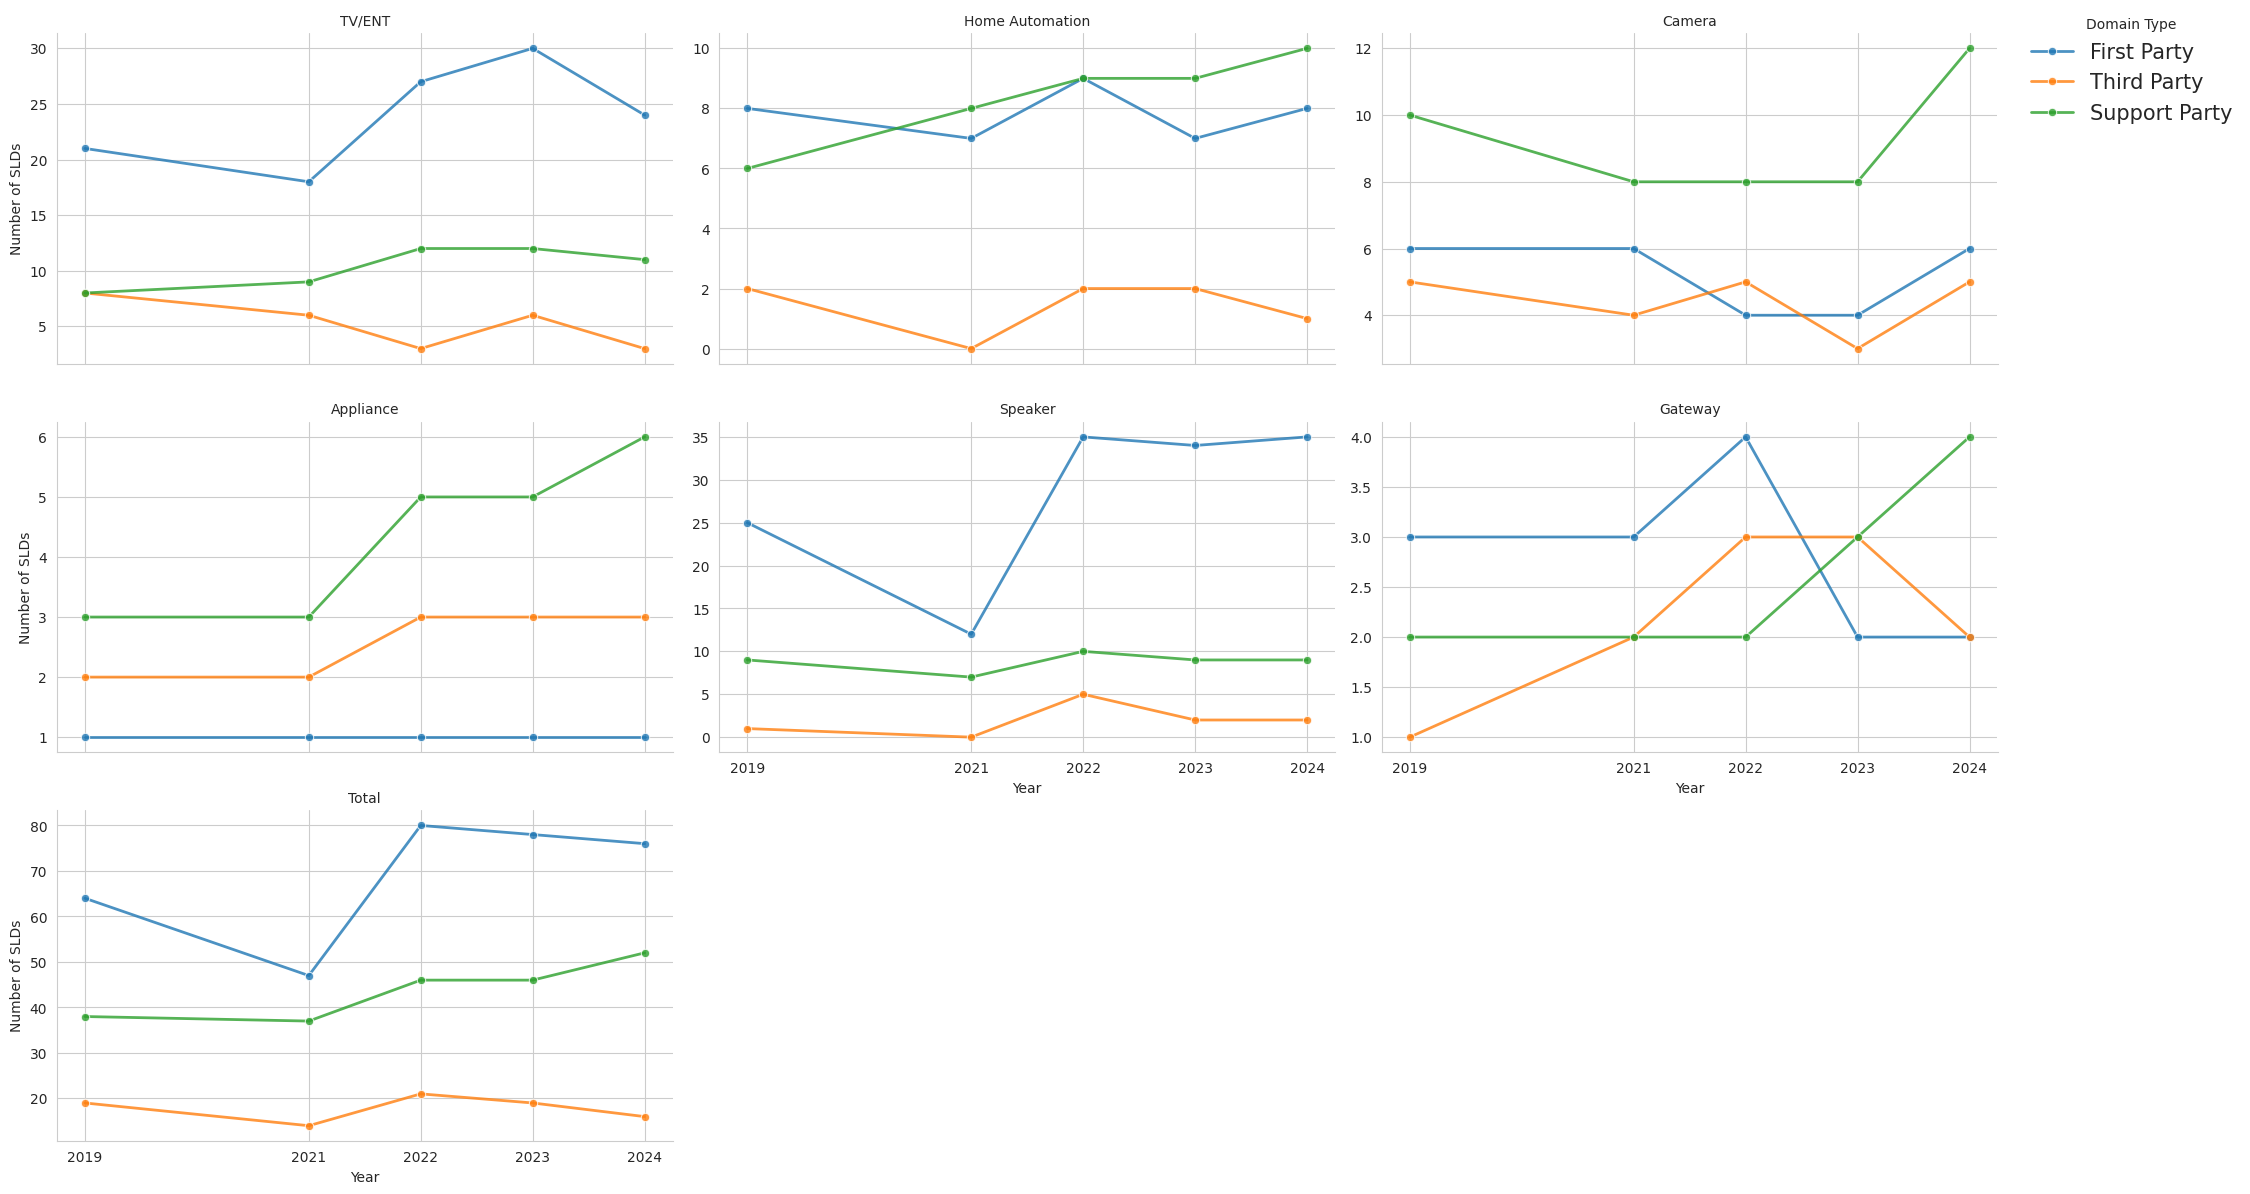

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# File paths (update with your actual paths)
base_dir = "/path_to_your_files"  # Replace with your directory
years = ["2019", "2021", "2022", "2023", "2024"]
file_template = "/home/hutr/iot-longitudinal/output_destination/common_devices/_domain_org_summary/{year}_contacted_slds_with_all_dns_org_per_category_per_category.csv"  # Replace with your file naming convention

# Initialize data storage
all_data = []

# Process each CSV file
for year in years:
    file_path = os.path.join(base_dir, file_template.format(year=year))
    try:
        yearly_data = pd.read_csv(file_path)
        yearly_data["Year"] = int(year)  # Add the year to the data
        all_data.append(yearly_data)
    except Exception as e:
        print(f"Error reading file for year {year}: {e}")

# Combine all years into a single DataFrame
df = pd.concat(all_data, ignore_index=True)

# Melt the DataFrame to make it long-form for Seaborn
df_long = df.melt(
    id_vars=["Category", "Year"], 
    value_vars=["First Party", "Third Party", "Support Party"],
    var_name="Domain Type", 
    value_name="SLDs Count"  # Avoid conflict with existing "Count" column
)

# Plot settings
g = sns.FacetGrid(df_long, col="Category", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, "Year", "SLDs Count", "Domain Type", marker="o", linewidth=2, alpha=0.8)

# Customize the plot
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of SLDs")
g.add_legend(title="Domain Type", bbox_to_anchor=(1, 1), loc="upper left", fontsize=15)
# g.figure.subtitle("Trends in Destination Domains by Domain Type (2019-2024)", y=1.02, fontsize=16)
g.set(xticks=[2019, 2021, 2022, 2023, 2024])
plt.tight_layout()
plt.show()

/tmp/ipykernel_1034742/1408641361.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap("Set2")


           Category  Count  Domain Count  First Party  Third Party  \
0            TV/ENT      3            37           22            8   
1   Home Automation      4            16            8            2   
2            Camera      6            21            6            5   
3         Appliance      3             6            1            2   
4           Speaker      4            36           26            1   
5           Gateway      2             6            3            1   
6             Total     22           122           66           19   
7   Home Automation      4            15            7            0   
8            Camera      5            18            6            4   
9         Appliance      3             6            1            2   
10           TV/ENT      3            33           18            6   
11          Speaker      4            19           12            0   
12          Gateway      2             7            3            2   
13            Total 

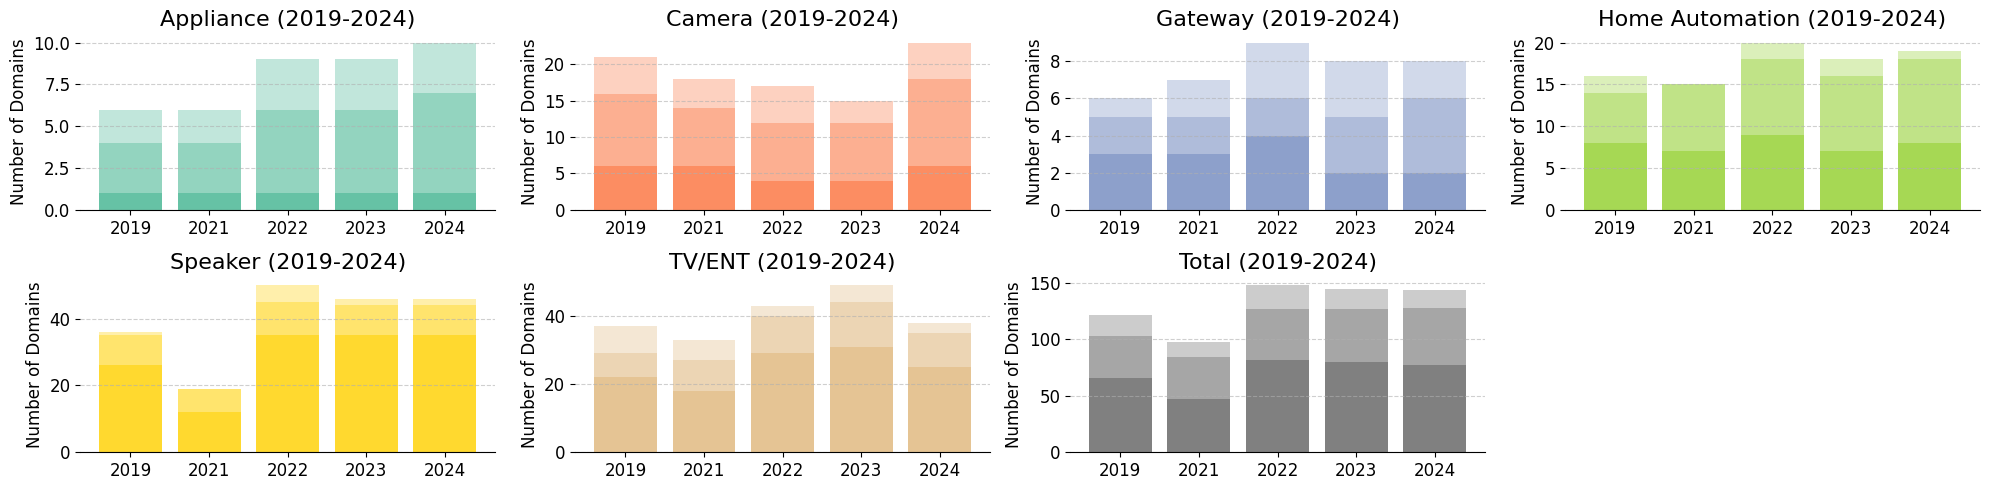

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# File paths (update with your actual paths)

years = ["2019", "2021", "2022", "2023", "2024"]
file_template = "/home/hutr/iot-longitudinal/output_destination/{device_comparison}/_domain_org_summary/{year}_contacted_slds_with_all_dns_org_per_category_per_category.csv"  # Replace with your file naming convention
device_comparison_set = ['common_devices', 'all_devices_remove_duplicates']

# Initialize data storage
all_data = []

# Process each CSV file
for year in years:
    file_path = file_template.format(year=year, device_comparison=device_comparison_set[0])
    try:
        yearly_data = pd.read_csv(file_path)
        yearly_data["Year"] = year  # Add the year to the data
        all_data.append(yearly_data)
    except Exception as e:
        print(f"Error reading file for year {year}: {e}")

# Combine all years into a single DataFrame
df = pd.concat(all_data, ignore_index=True)
existing_categories = sorted(df["Category"].unique())

# Define the color palette
cmap = matplotlib.cm.get_cmap("Set2")
categories = sorted(['Camera', 'TV/ENT', 'Home Automation', 'Gateway', 'Appliance', 'Speaker', 'Health'])
palette = dict(zip(categories, cmap.colors[:len(categories)]))

# Include "Total" for overall trends
categories_with_total = categories + ["Total"]
palette['Total'] = 'gray'

# Create a separate plot for each category
fig = plt.figure(figsize=(20, 5))
# n_rows = 3
# n_cols = 3
n_categories = len(existing_categories) - 1  # Exclude "Total" for the smaller plots
n_cols = 4
n_rows = 2  

gs = fig.add_gridspec(n_rows, n_cols) # , height_ratios=[1] * (n_rows - 1) + [2]
print(df)

for i, category in enumerate(existing_categories[:]):
    row, col = divmod(i, n_cols)
    ax = fig.add_subplot(gs[row, col])
    category_data = df[df["Category"] == category]
    x = category_data["Year"].unique()
    
    # Stacked bar chart
    ax.bar(
        x,
        category_data["First Party"],
        label="First Party",
        color=palette[category],
        alpha=1.0
    )
    ax.bar(
        x,
        category_data["Support Party"],
        label="Support Party",
        color=palette[category],
        alpha=0.7,
        bottom=category_data["First Party"]
    )
    ax.bar(
        x,
        category_data["Third Party"],
        label="Third Party",
        color=palette[category],
        alpha=0.4,
        bottom=category_data["First Party"] + category_data["Support Party"]
    )
    
    # Customize each subplot
    ax.set_title(f"{category} (2019-2024)", fontsize=16)
    ax.set_ylabel("Number of Domains", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    
    # if i == len(categories_with_total) - 1:
    # x tick labels
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
# # Plot the larger "Total" subplot
# ax_total = fig.add_subplot(gs[-1, :])  # Occupy the entire last row
# total_data = df[df["Category"] == "Total"]
# x = total_data["Year"].unique()

# ax_total.bar(
#     x,
#     total_data["First Party"],
#     label="First Party",
#     color=palette["Total"],
#     alpha=1.0
# )
# ax_total.bar(
#     x,
#     total_data["Support Party"],
#     label="Support Party",
#     color=palette["Total"],
#     alpha=0.7,
#     bottom=total_data["First Party"]
# )
# ax_total.bar(
#     x,
#     total_data["Third Party"],
#     label="Third Party",
#     color=palette["Total"],
#     alpha=0.4,
#     bottom=total_data["First Party"] + total_data["Support Party"]
# )

# # Customize "Total" subplot
# ax_total.set_title("Total", fontsize=14)
# ax_total.set_ylabel("Number of Domains", fontsize=12)
# ax_total.set_xlabel("Year", fontsize=12)
# ax_total.grid(axis="y", linestyle="--", alpha=1)

# Add shared legend
# handles, labels = ax_total.get_legend_handles_labels()
# fig.legend(handles, labels, title="Domain Type", loc="lower right", fontsize=14)
# fig.legend(
#     *ax.get_legend_handles_labels(),
#     title="Domain Type",
#     loc="upper left",
#     fontsize=14,
#     bbox_to_anchor=(0, 1),
#     bbox_transform=ax.transAxes,
# )
# Remove spines except bottom
sns.despine(left=True)

# Adjust layout
plt.tight_layout()
plt.savefig("figures/common_device_stacked_bar_per_category_over_year.pdf", dpi=300)



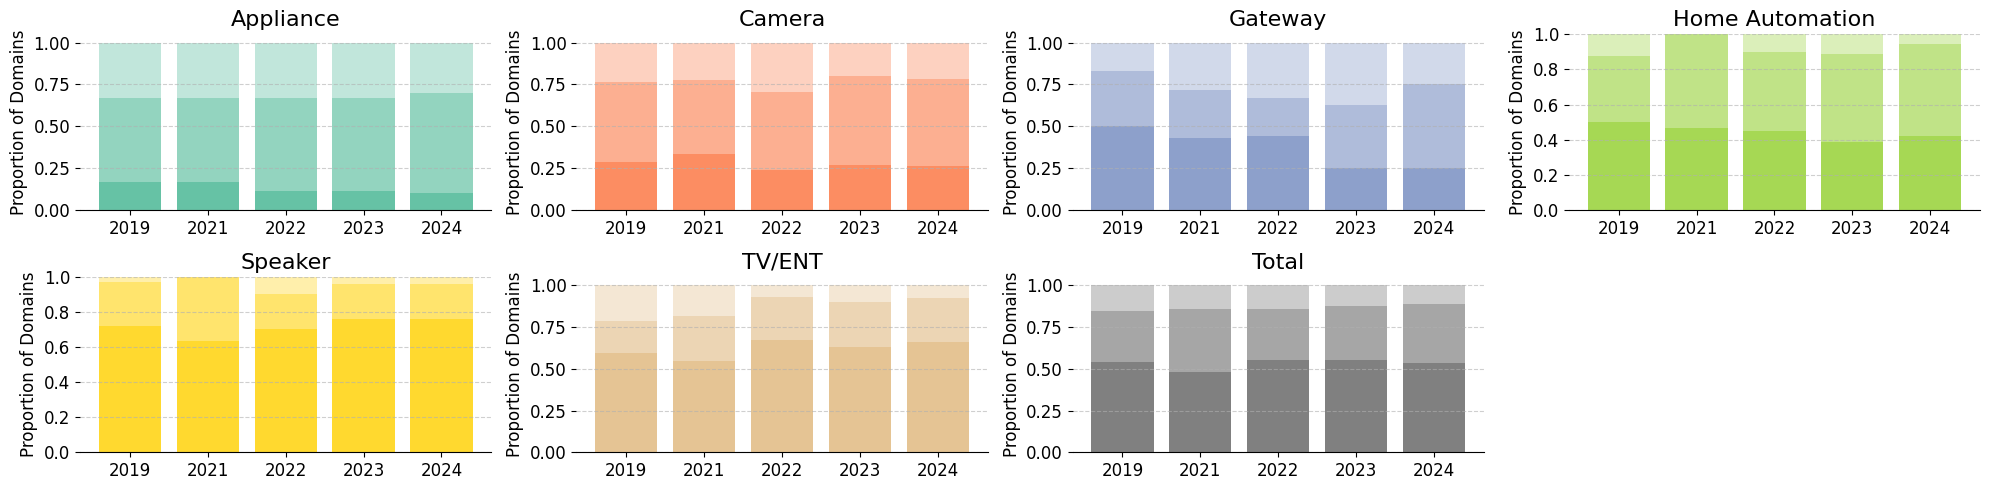

In [2]:
# Calculate proportions
df["Total"] = df["First Party"] + df["Third Party"] + df["Support Party"]
df["First Party (%)"] = df["First Party"] / df["Total"]
df["Third Party (%)"] = df["Third Party"] / df["Total"]
df["Support Party (%)"] = df["Support Party"] / df["Total"]

# Define subplot grid dimensions
n_categories = len(existing_categories) - 1  # Exclude "Total" for the smaller plots
n_cols = 4
n_rows = 2 # -(-n_categories // n_cols) + 1  # Additional row for "Total"

# Create the figure with adjusted height for the last row
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(n_rows, n_cols) #) all_device_stacked_bar_per_category_over_year.pdf

# Plot smaller subplots for individual categories
for i, category in enumerate(existing_categories[:]):  # Exclude "Total"
    row, col = divmod(i, n_cols)
    ax = fig.add_subplot(gs[row, col])
    category_data = df[df["Category"] == category]
    x = category_data["Year"].unique()
    
    # Proportional stacked bar chart
    ax.bar(
        x,
        category_data["First Party (%)"],
        label="First Party",
        color=palette[category],
        alpha=1.0
    )
    ax.bar(
        x,
        category_data["Support Party (%)"],
        label="Support Party",
        color=palette[category],
        alpha=0.7,
        bottom=category_data["First Party (%)"]
    )
    ax.bar(
        x,
        category_data["Third Party (%)"],
        label="Third Party",
        color=palette[category],
        alpha=0.4,
        bottom=category_data["First Party (%)"] + category_data["Support Party (%)"]
    )
    
    # Customize each subplot
    ax.set_title(f"{category}", fontsize=16)
    ax.set_ylabel("Proportion of Domains", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# # Plot the larger "Total" subplot
# ax_total = fig.add_subplot(gs[-1, :])  # Occupy the entire last row
# total_data = df[df["Category"] == "Total"]
# x = total_data["Year"].unique()

# ax_total.bar(
#     x,
#     total_data["First Party (%)"],
#     label="First Party",
#     color=palette["Total"],
#     alpha=1.0
# )
# ax_total.bar(
#     x,
#     total_data["Support Party (%)"],
#     label="Support Party",
#     color=palette["Total"],
#     alpha=0.7,
#     bottom=total_data["First Party (%)"]
# )
# ax_total.bar(
#     x,
#     total_data["Third Party (%)"],
#     label="Third Party",
#     color=palette["Total"],
#     alpha=0.4,
#     bottom=total_data["First Party (%)"] + total_data["Support Party (%)"]
# )

# # Customize "Total" subplot
# ax_total.set_title("Total", fontsize=14)
# ax_total.set_ylabel("Proportion of Domains", fontsize=12)
# ax_total.set_xlabel("Year", fontsize=12)
# ax_total.grid(axis="y", linestyle="--", alpha=0.6)

# Add shared legend
# handles, labels = ax_total.get_legend_handles_labels()
# fig.legend(handles, labels, title="Domain Type", loc="upper right", fontsize=10)
# fig.legend(
#     *ax.get_legend_handles_labels(),
#     title="Domain Type",
#     loc="upper left",
#     fontsize=14,
#     bbox_to_anchor=(0, 1),
#     bbox_transform=ax.transAxes,
# )
# Remove spines except bottom
sns.despine(left=True)
# Adjust layout
plt.tight_layout()
plt.savefig("figures/common_device_proportional_stacked_bar_per_category_over_year.pdf", dpi=300)